In [1]:
#Importamos las primeras bibliotecas
import nltk #importamos nltk

In [2]:
import matplotlib.pyplot as plt #importamos para graficos
import seaborn as sns #importamos para graficos

In [3]:
#descargamos los complementos de nltk
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Armando\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Armando\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [4]:
archivo=open("sustantivos_malos_borrar.txt",'r', encoding='utf8')#lo primero que hacemos es importar el archivo de texto, en r de reescribir
texto1=archivo.read() #el texto del txt se queda en la variable texto1

In [5]:
print(texto1)

café
sabor
producto
granos
amazon
fecha
grano
precio
tostado
bolsa
calidad
caducidad
frasco
lata
vez
marca
mismo
cafe
máquina
meses
compra
embargo
etiqueta
mas
taza
cafés
cualquier
frascos
agua
año
años
empaque
experiencia
lavazza
méxico
mezcla
tiempo
tienda
cuanto
filtros
gran
latas
leche
medio
mejor
pena
problema
verdad
aroma
azúcar
caja
caso
cosa
cuerpo
hecho
illy
manera
nescafé
productos
sello
servicio
usted
valor
alguna
buen
cada
cafeína
compré
crema
desgracia
diferencia
espresso
filtro
frescura
garantía
general
gramos
hermanas
imagen
momento
ningún
opción
papel
parte
pedido
pour
primera
razón
reembolso
super
tamaño
tipo
través
uso
válvulas
venta
acuerdo
algún
arábica
artículo
asado
bolsas
cajas
cantidad
cápsulas
casa
comentarios
comestibles
costo
cualquiera
davidoff
días
dieta
dinero
dólares
ejemplo
estándares
falta
final
for
is
krups
lado
lote
lugar
mal
mañana
mejores
mes
método
minutos
mitad
modo
molienda
ninguna
notas
olor
over
parecer
pedí
peso
punto
repuesto
segunda
semanas


In [6]:
type(texto1)

str

In [7]:
#TOKENIZACIÓN POR PALABRA
from nltk.tokenize import word_tokenize
tokens = word_tokenize(texto1,"spanish")
tokens=[word.lower() for word in tokens if word.isalpha()] # Remover los signos de puntuación
print(tokens)

['café', 'sabor', 'producto', 'granos', 'amazon', 'fecha', 'grano', 'precio', 'tostado', 'bolsa', 'calidad', 'caducidad', 'frasco', 'lata', 'vez', 'marca', 'mismo', 'cafe', 'máquina', 'meses', 'compra', 'embargo', 'etiqueta', 'mas', 'taza', 'cafés', 'cualquier', 'frascos', 'agua', 'año', 'años', 'empaque', 'experiencia', 'lavazza', 'méxico', 'mezcla', 'tiempo', 'tienda', 'cuanto', 'filtros', 'gran', 'latas', 'leche', 'medio', 'mejor', 'pena', 'problema', 'verdad', 'aroma', 'azúcar', 'caja', 'caso', 'cosa', 'cuerpo', 'hecho', 'illy', 'manera', 'nescafé', 'productos', 'sello', 'servicio', 'usted', 'valor', 'alguna', 'buen', 'cada', 'cafeína', 'compré', 'crema', 'desgracia', 'diferencia', 'espresso', 'filtro', 'frescura', 'garantía', 'general', 'gramos', 'hermanas', 'imagen', 'momento', 'ningún', 'opción', 'papel', 'parte', 'pedido', 'pour', 'primera', 'razón', 'reembolso', 'super', 'tamaño', 'tipo', 'través', 'uso', 'válvulas', 'venta', 'acuerdo', 'algún', 'arábica', 'artículo', 'asado',

In [8]:
len(tokens)

872

In [9]:
import numpy as np
lista_unicos=np.unique(tokens)
len(lista_unicos)

872

In [10]:
#!pip install --upgrade gensim

Requirement already up-to-date: gensim in c:\users\armando\anaconda3\lib\site-packages
Requirement already up-to-date: scipy>=0.18.1 in c:\users\armando\anaconda3\lib\site-packages (from gensim)
Requirement already up-to-date: smart-open>=1.8.1 in c:\users\armando\anaconda3\lib\site-packages (from gensim)
Requirement already up-to-date: numpy>=1.11.3 in c:\users\armando\anaconda3\lib\site-packages (from gensim)
Requirement already up-to-date: Cython==0.29.14 in c:\users\armando\anaconda3\lib\site-packages (from gensim)
Requirement already up-to-date: six>=1.5.0 in c:\users\armando\anaconda3\lib\site-packages (from gensim)
Requirement already up-to-date: requests in c:\users\armando\anaconda3\lib\site-packages (from smart-open>=1.8.1->gensim)
Requirement already up-to-date: boto in c:\users\armando\anaconda3\lib\site-packages (from smart-open>=1.8.1->gensim)
Requirement already up-to-date: jmespath<1.0.0,>=0.7.1 in c:\users\armando\anaconda3\lib\site-packages (from boto3->smart-open>=1.

You are using pip version 9.0.1, however version 20.1.1 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [11]:
from gensim.models import Word2Vec #importamos Word2Vec de gensim para modelar

In [12]:
from gensim.models.keyedvectors import KeyedVectors #para llamar modelos ya entrenados

In [13]:
modelo = KeyedVectors.load_word2vec_format("./sbw_vectors.bin", binary=True) #modelo español

In [14]:
modelo.most_similar(positive=["ron","cola"],topn=1)

[('cubalibre', 0.6797232031822205)]

## EJEMPLO DE COMO HACER VECTORES

In [245]:
listado=["manzana","pera","fresa","mandarina","auto","aguadón","cabra","perico","coche","automovil"]
type(listado)

list

In [246]:
for doc in listado:
    palabras_bien = filter(lambda x: x in modelo.vocab, listado)

In [247]:
palabras_filtradas = list(palabras_bien)

In [249]:
type(palabras_filtradas)

list

In [250]:
pala=modelo[palabras_filtradas]
print(pala)

[[ 0.16856     0.11906052 -0.02751338 ...  0.29533735  0.21079825
   0.05968495]
 [ 0.08520026 -0.03410327 -0.16523191 ...  0.03365397  0.10491783
   0.21899226]
 [ 0.09852193  0.2907289  -0.12885109 ...  0.05276096  0.5136821
  -0.0290894 ]
 ...
 [ 0.01627187  0.07527017 -0.05590526 ... -0.43227488 -0.09132934
   0.40572512]
 [-0.12078531 -0.19789737 -0.27196273 ... -0.18663022 -0.20842281
   0.17777221]
 [ 0.01049928 -0.0782245  -0.2585719  ... -0.15084435 -0.0348958
   0.28121254]]


In [227]:
from sklearn.decomposition import PCA #Para Graficar PCA functions

In [28]:
# Transformar modelo 2d
X = pala
pca = PCA(n_components=2)
result = pca.fit_transform(X)

NameError: name 'pala' is not defined

In [253]:
result

array([[-0.97463036, -0.9563973 ],
       [-1.6997247 , -0.6616557 ],
       [-1.587108  , -0.7527106 ],
       [-1.755997  , -0.98148775],
       [ 2.492784  , -0.2963051 ],
       [-0.98894715,  0.6697058 ],
       [-0.37479183,  3.8510637 ],
       [ 2.4464664 , -0.1569927 ],
       [ 2.4419498 , -0.71522045]], dtype=float32)

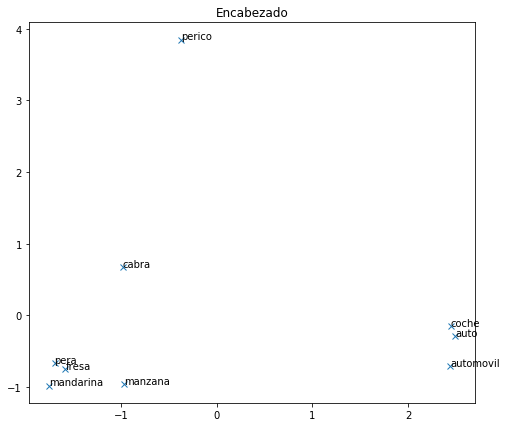

In [254]:
# create a plot of the projection
fig, ax = plt.subplots()
fig.set_size_inches(8, 7)
ax.plot(result[:, 0], result[:, 1], 'x')
ax.set_title('Encabezado')


words = list(palabras_filtradas)
for i, word in enumerate(words):
    plt.annotate(word, xy=(result[i, 0],result[i, 1]))

plt.show()

## TERMINA EJEMPLO

In [15]:
for doc in lista_unicos:
    solo_vocabulario = filter(lambda x: x in modelo.vocab, lista_unicos)

In [16]:
slo_vocabulario_lista=list(solo_vocabulario)

In [17]:
modelo_aplicado=modelo[slo_vocabulario_lista]

In [19]:
from sklearn.decomposition import PCA #Para Graficar PCA functions

In [29]:
# Transformar modelo 2d
X = modelo_aplicado
pca = PCA(n_components=2)
resultado = pca.fit_transform(X)

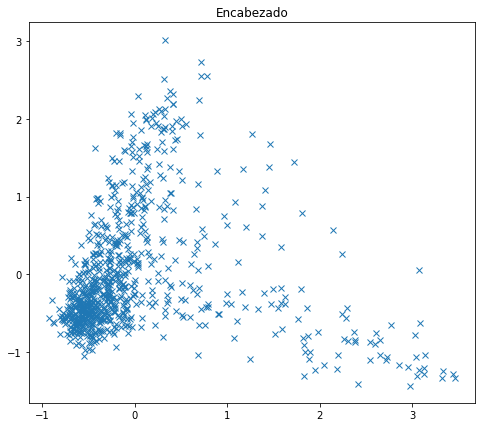

In [30]:
# create a plot of the projection
fig, ax = plt.subplots()
fig.set_size_inches(8, 7)
ax.plot(resultado[:, 0], resultado[:, 1], 'x')
ax.set_title('Encabezado')

'''
words = list(slo_vocabulario_lista)
for i, word in enumerate(words):
    plt.annotate(word, xy=(resultado[i, 0],resultado[i, 1]))
'''

plt.show()

## exportar a data frame

In [32]:
import pandas as pd    
df = pd.DataFrame(resultado)
df.columns = ["valorx", "Valory","valorz"]
#df.to_csv('filename_oraciones_chidas.csv', index=False)

In [33]:
df

,valorx,Valory,valorz
0,0.117386,1.159882,-0.499989
1,-0.474490,-0.881412,-0.338781
2,-0.585304,0.370671,0.512000
3,-0.425529,-0.756012,0.373078
4,-0.212580,-0.084259,1.066865
5,-0.696856,-0.313137,-0.495002
6,0.030455,2.284604,-0.349289
7,0.191131,2.065706,0.134328
8,-0.417426,-0.440726,-0.445425
9,-0.660911,-0.750924,-0.347866


In [34]:
df['nombre'] =slo_vocabulario_lista

In [35]:
df

,valorx,Valory,valorz,nombre
0,0.117386,1.159882,-0.499989,abrazadera
1,-0.474490,-0.881412,-0.338781,abril
2,-0.585304,0.370671,0.512000,abrirla
3,-0.425529,-0.756012,0.373078,absoluto
4,-0.212580,-0.084259,1.066865,abuela
5,-0.696856,-0.313137,-0.495002,accidentes
6,0.030455,2.284604,-0.349289,aceite
7,0.191131,2.065706,0.134328,acidez
8,-0.417426,-0.440726,-0.445425,actualidad
9,-0.660911,-0.750924,-0.347866,acuerdo


In [36]:
df.to_csv('burbujas3d_malos.csv', index=False)